# Ridge classifier with Scale

# Required Packages


In [61]:
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as se
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
warnings.filterwarnings('ignore')

# Initialization

Path for csv file

In [62]:
#filepath
file_path= ""

In [63]:
#x_values
features=[]

In [64]:
#y_value
target=''

# Data fetching
pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [65]:
#read_csv
df=pd.read_csv(file_path)
df

,candidate_id,country,organization,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
0,2.680000e+11,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,01-03-2012,May-12,95,1,...,0,0,0,1,0,0,0,0,0,1
1,6.730000e+11,Y,"Swanson, Newton and Miller",4.875,144000,360,01-01-2012,Mar-12,72,1,...,0,0,0,0,0,0,0,1,0,1
2,7.430000e+11,Z,Thornton-Davis,3.250,366000,180,01-01-2012,Mar-12,49,1,...,0,0,0,0,0,0,0,0,0,1
3,6.010000e+11,X,OTHER,4.750,135000,360,01-02-2012,Apr-12,46,2,...,0,0,0,0,0,1,1,1,1,1
4,2.740000e+11,X,OTHER,4.750,124000,360,01-02-2012,Apr-12,80,1,...,3,4,5,6,7,8,9,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,3.820000e+11,Y,Browning-Hart,4.125,153000,360,01-02-2012,Apr-12,88,2,...,0,0,0,0,0,0,0,0,0,0
116054,5.830000e+11,Z,OTHER,3.000,150000,120,01-01-2012,Mar-12,35,1,...,0,0,0,0,0,0,0,0,0,0
116055,8.380000e+11,X,OTHER,3.875,166000,360,01-02-2012,Apr-12,58,2,...,0,0,0,0,0,0,0,0,0,0
116056,4.770000e+11,X,OTHER,4.250,169000,360,01-02-2012,Apr-12,74,2,...,0,0,0,0,0,0,0,0,0,0


# Feature Selections
We will assign all the required input features to X and target/outcome to Y.

In [67]:
#Get training and testing dataset 
X=df[features]
Y=df[target]

# Data Preprocessing
Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [68]:
#function for replacing the null values
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.

In [69]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X

,candidate_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,origination_date_01-01-2012,origination_date_01-02-2012,origination_date_01-03-2012,first_payment_date_Apr-12,first_payment_date_Feb-12,first_payment_date_Mar-12,first_payment_date_May-12,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,2.680000e+11,4.250,214000,360,95,1,22,694,30,0,...,0,0,1,0,0,0,1,0,0,1
1,6.730000e+11,4.875,144000,360,72,1,44,697,0,0,...,1,0,0,0,0,1,0,0,1,0
2,7.430000e+11,3.250,366000,180,49,1,33,780,0,0,...,1,0,0,0,0,1,0,0,1,0
3,6.010000e+11,4.750,135000,360,46,2,44,633,0,638,...,0,1,0,1,0,0,0,0,1,0
4,2.740000e+11,4.750,124000,360,80,1,43,681,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,3.820000e+11,4.125,153000,360,88,2,22,801,25,802,...,0,1,0,1,0,0,0,1,0,0
116054,5.830000e+11,3.000,150000,120,35,1,37,796,0,0,...,1,0,0,0,0,1,0,0,1,0
116055,8.380000e+11,3.875,166000,360,58,2,49,724,0,723,...,0,1,0,1,0,0,0,0,1,0
116056,4.770000e+11,4.250,169000,360,74,2,13,755,0,746,...,0,1,0,1,0,0,0,1,0,0


# Correlation Map
In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

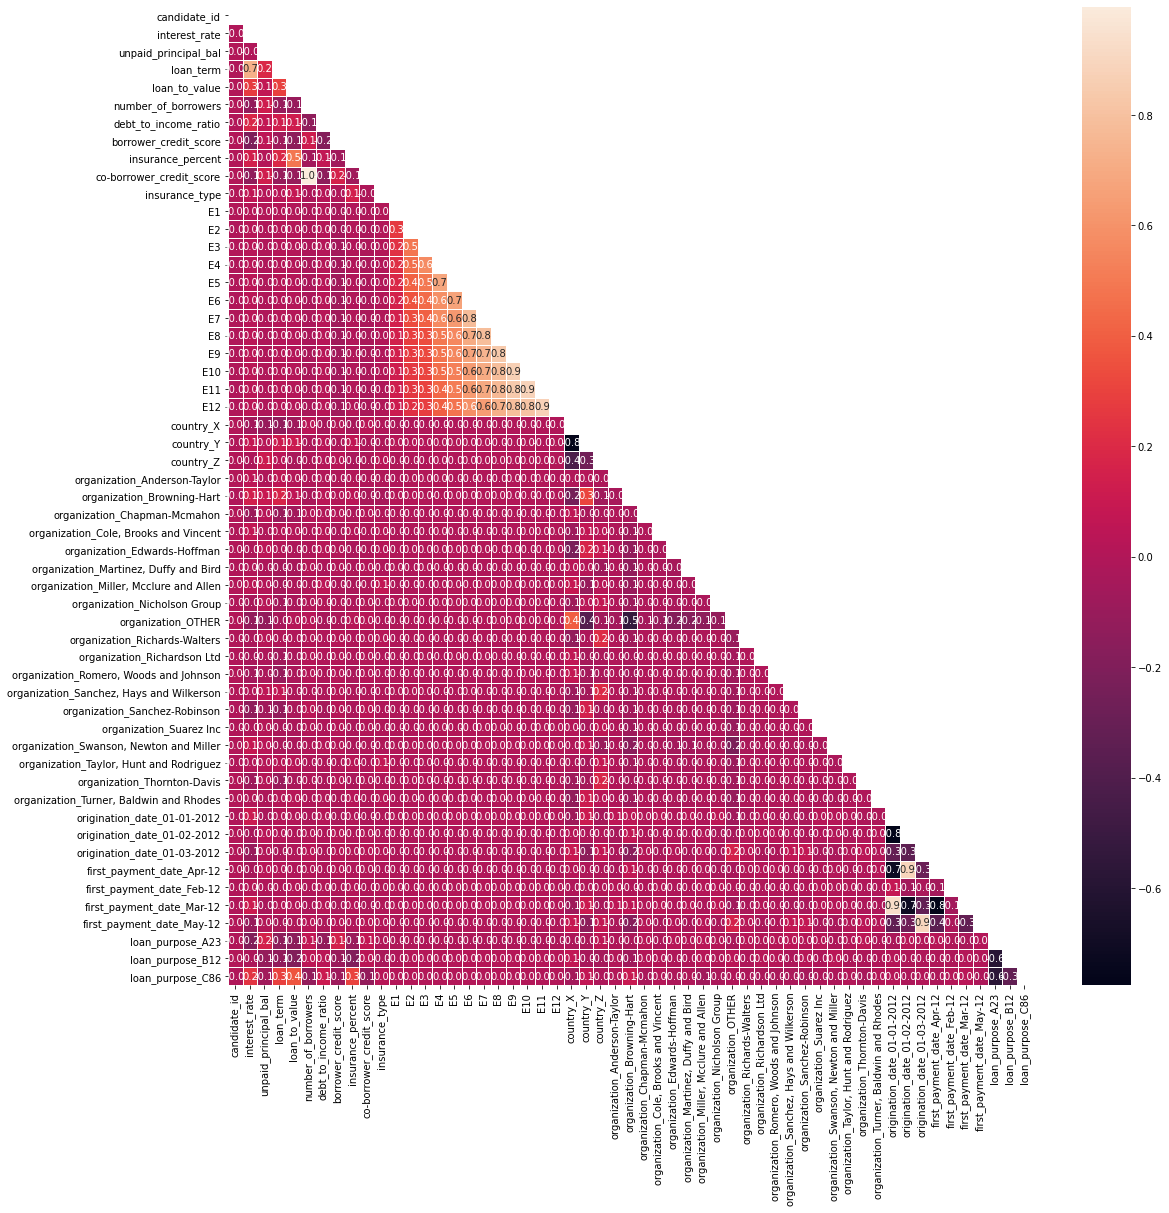

In [70]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

# Data Splitting
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [71]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=120)

# Model
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

$$\begin{equation*}
\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2
\end{equation*}$$

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [72]:
# Build Model here
model = make_pipeline(StandardScaler(),RidgeClassifier(random_state=123))
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgeclassifier', RidgeClassifier(random_state=123))])

# Model Accuracy

In [73]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 99.51 %



## Confusion Matrix¶
A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known

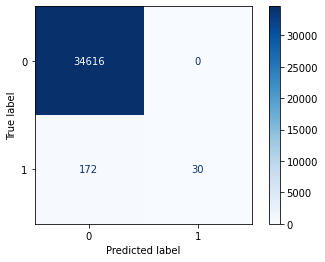

In [74]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

where:
Precision:- Accuracy of positive predictions.

Recall:- Fraction of positives that were correctly identified.

f1-score:- percent of positive predictions were correct

support:- Support is the number of actual occurrences of the class in the specified dataset.

In [75]:
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34616
           1       1.00      0.15      0.26       202

    accuracy                           1.00     34818
   macro avg       1.00      0.57      0.63     34818
weighted avg       1.00      1.00      0.99     34818



# Creator - Prajwal Nimje, Github: [Profile](https://github.com/PrajwalNimje1997)